# Picklist
## Data

In [1]:
import pandas as pd

df = pd.read_csv("picklist.csv")
df['teamNumber'] = df['teamNumber'].apply(str)
df["defenseRating"] = df["defenseRating"].map({"e":5, "g":4,"a":3, "b":2, "x":1, None:0})
df

,eventCode,matchLevel,matchNumber,match_key,robot,teamNumber,autoStartingLocation,taxi,autoUpper,autoLower,...,autoLowerScore,upperScore,lowerScore,climbScore,endgameScore,totalScore,climbLevel,wasDefendedMetric,diedMetric,heldCargoMetric
0,2022ilch,qm,1.0,2022ilch_qm1,r1,8802.0,18.0,Y,0.0,0.0,...,0,0,0.0,0,0,2,0,0,1,0
1,2022ilch,qm,1.0,2022ilch_qm1,b1,7460.0,29.0,Y,1.0,0.0,...,0,10,0.0,15,15,31,4,1,0,0
2,2022ilch,qm,1.0,2022ilch_qm1,b2,2830.0,29.0,Y,1.0,0.0,...,0,16,0.0,6,6,28,2,0,0,0
3,2022ilch,qm,1.0,2022ilch_qm1,r3,8880.0,41.0,N,0.0,0.0,...,0,2,0.0,6,6,8,2,0,0,0
4,2022ilch,qm,1.0,2022ilch_qm1,b3,111.0,41.0,Y,5.0,0.0,...,0,14,1.0,0,0,37,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2022ilch,qm,77.0,2022ilch_qm77,r1,4145.0,32.0,Y,0.0,0.0,...,0,2,0.0,15,15,19,4,0,0,0
463,2022ilch,qm,78.0,2022ilch_qm78,r1,3067.0,44.0,Y,0.0,0.0,...,0,0,2.0,6,6,10,2,0,0,0
464,2022ilch,qm,79.0,2022ilch_qm79,r1,2220.0,44.0,Y,0.0,0.0,...,0,8,0.0,15,15,25,4,0,0,0
465,2022ilch,qm,75.0,2022ilch_qm75,b2,4702.0,32.0,Y,0.0,0.0,...,0,0,0.0,6,6,8,2,0,0,1


## Number of teams

In [2]:
teams = df["teamNumber"].unique()
print("Number of teams: ", len(teams))
print("List:", teams)

Number of teams:  48
List: ['8802.0' '7460.0' '2830.0' '8880.0' '111.0' '3734.0' '101.0' '8029.0'
 '4241.0' '8868.0' '2451.0' '112.0' '2022.0' '3061.0' '2220.0' '6651.0'
 '5847.0' '1781.0' '2062.0' '4645.0' '3488.0' '7237.0' '6381.0' '3695.0'
 '5553.0' '2338.0' '3352.0' '4145.0' '5822.0' '48.0' '8122.0' '3067.0'
 '5934.0' '8096.0' '2358.0' '5125.0' '1739.0' '2151.0' '4292.0' '1625.0'
 '677.0' '4702.0' '1732.0' '3110.0' '4787.0' '4096.0' '7560.0' 'nan']


## Average performance of each team

In [3]:
metrics = df.groupby("teamNumber").mean()[["climbScore", "autoScore", "teleopScore", "totalScore", "defenseRating", "speedRating"]].reset_index()
metrics

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating
0,101.0,0.000000,0.000000,0.000000,2.000000,3.000000,3.200000
1,111.0,9.500000,17.600000,23.500000,52.400000,1.800000,4.800000
2,112.0,7.800000,3.600000,14.900000,28.100000,1.500000,3.700000
3,1625.0,9.555556,4.000000,10.000000,25.555556,1.222222,3.666667
4,1732.0,6.444444,13.333333,26.666667,48.444444,1.777778,4.888889
5,1739.0,3.545455,1.454545,2.636364,9.636364,1.818182,2.181818
6,1781.0,12.142857,2.857143,9.428571,26.428571,2.000000,3.428571
7,2022.0,5.090909,3.454545,3.090909,13.090909,2.090909,3.181818
8,2062.0,3.600000,3.600000,6.500000,15.700000,1.900000,3.000000
9,2151.0,0.000000,0.363636,0.000000,2.181818,1.636364,1.909091


In [4]:
metrics.describe()

,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating
count,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000
mean,5.305775,3.935366,6.960949,17.985844,1.830346,3.092785
std,3.844478,4.251401,6.876895,13.519701,0.742989,0.772786
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000
25%,2.650000,1.530303,1.991667,8.950000,1.400000,2.627778
50%,4.666667,2.828571,4.733333,13.888889,1.666667,3.100000
75%,7.800000,4.181818,10.277778,25.882143,1.900000,3.550000
max,14.000000,17.600000,26.666667,52.400000,4.500000,4.888889


## Numeric Variable Distribution and Correlation

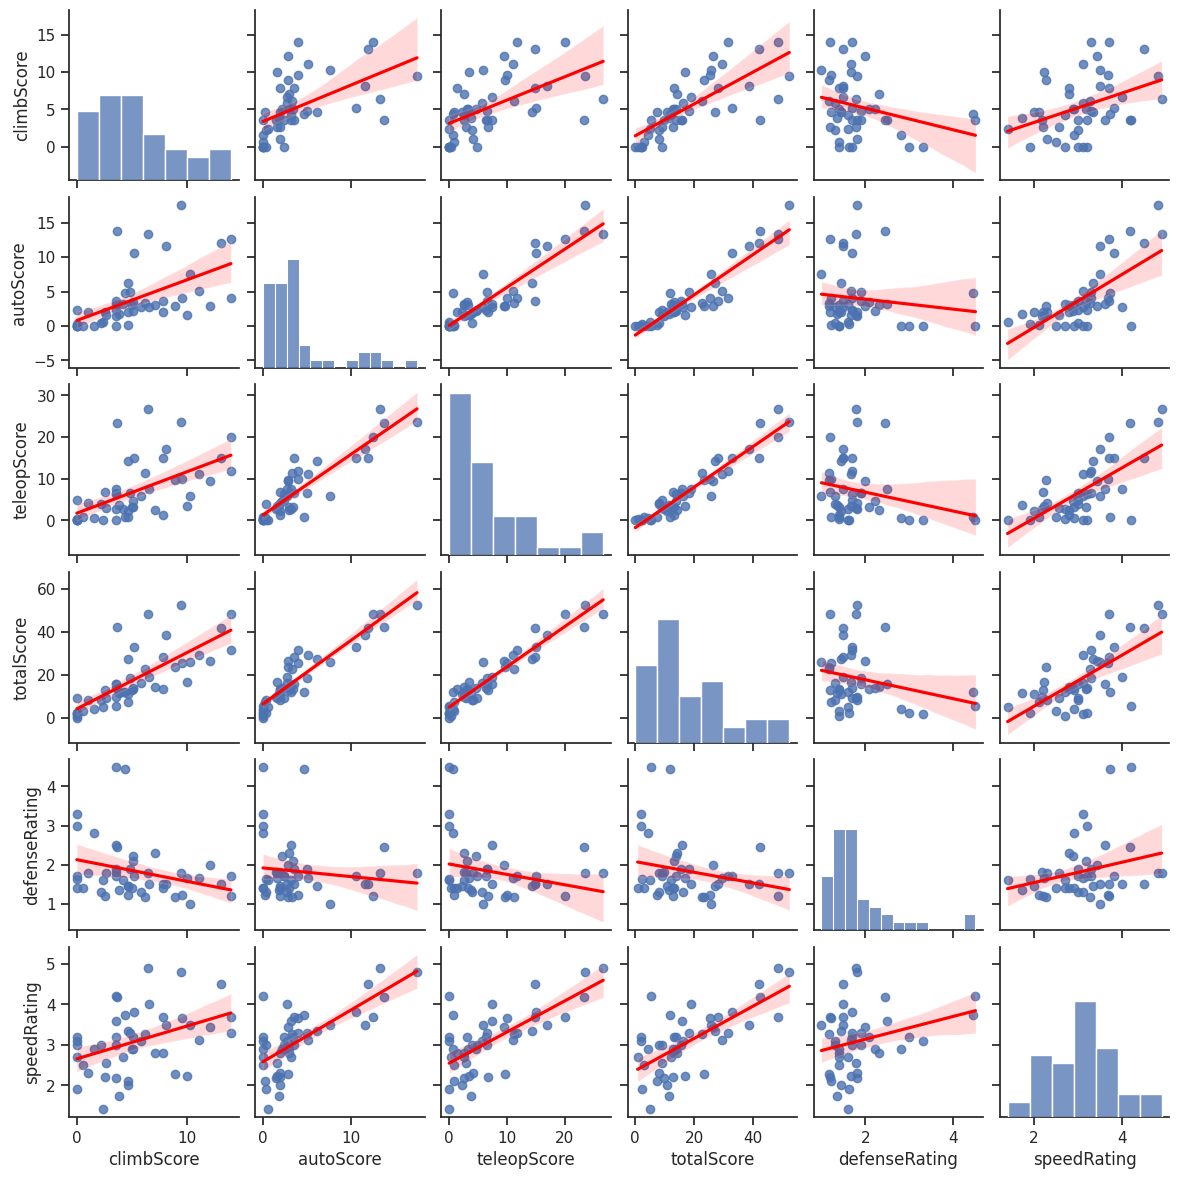

In [5]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(metrics, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=2)

## Cluster of Robots
The following code helps us to find cluster of robots with similar performance, which will be helpful to generate our picklist. The algorithm used is KMeans which generates groups by mathematically finding the ones closer to certain centroids.

In [6]:
stats_train = metrics.drop(columns=["teamNumber"]).fillna(0)

### Identifying the amount of clusters that are findable within the data

<AxesSubplot: >

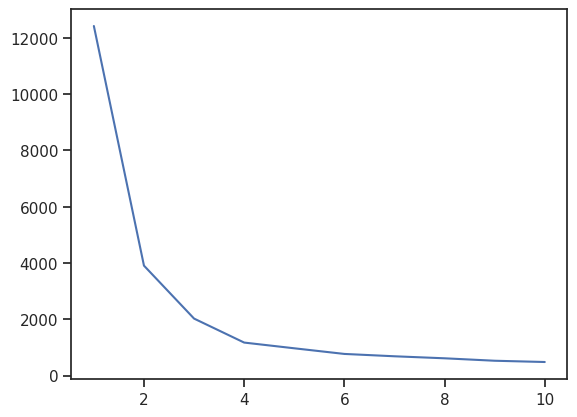

In [7]:
from sklearn.cluster import KMeans
stats_transformed = stats_train#[["speedRating", "totalScore"]]
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, random_state=123)
    clustering.fit(stats_transformed)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

In [8]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)
cluster_labels = kmeans.labels_
metrics['cluster'] = cluster_labels

In [9]:
import collections, numpy
counter = collections.Counter(cluster_labels)
counter

Counter({0: 14, 2: 6, 1: 10, 3: 18})

## Statistic Description of each cluster

In [10]:
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = metrics[metrics['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

columns = stats_transformed.columns
cluster_stats(columns)

,cluster,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating
0,0,1.34,0.54,1.33,4.74,2.11,2.68
1,1,8.99,5.02,11.32,27.30,1.46,3.34
2,2,9.13,13.49,20.89,45.38,1.71,4.26
3,3,5.07,2.79,4.27,13.98,1.88,2.86


In [11]:
metrics[metrics["teamNumber"]=="111.0"]

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating,cluster
1,111.0,9.5,17.6,23.5,52.4,1.8,4.8,2


# Highlighting with color
Red for our robot
Orange for robots with higher ranking than us
Green for robots that are above rank 17th
White for every other robot

### Cluster 2 
This clusters the robots with the best and most balanced metrics

In [12]:
TOP= metrics[metrics["cluster"]==2]
colors_dict = { team:"pink" for team in TOP.teamNumber.unique()}
colors_dict["111.0"] = "red"
colors_dict["2338.0"] = "orange"
colors_dict["1732.0"] = "orange"
colors_dict["2451.0"] = "orange"
def highlight(s):
    if s.teamNumber in  ["3695.0", "2830.0", "4145.0", "7560.0", "5822.0", "8029.0", "8122.0", "2220.0", "3067.0", "5934.0", "8802.0", "5553.0", "4292.0"]:
        return ['background-color: green'] * len(s)           
    else:
        return ['background-color: white'] * len(s) 
TOP.style.apply(highlight, axis=1)            

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating,cluster
1,111.0,9.500000,17.600000,23.500000,52.400000,1.800000,4.800000,2
4,1732.0,6.444444,13.333333,26.666667,48.444444,1.777778,4.888889,2
11,2338.0,14.000000,12.600000,20.000000,48.400000,1.200000,3.700000,2
13,2451.0,3.636364,13.818182,23.272727,42.363636,2.454545,4.181818,2
15,3061.0,13.100000,12.000000,14.900000,42.000000,1.500000,4.500000,2
29,48.0,8.100000,11.600000,17.000000,38.700000,1.500000,3.500000,2


### Cluster 1
This clusters the robots with the second best and second most balanced metrics

In [13]:
TOP2= metrics[metrics["cluster"]==1]
def highlight(s):
    if s.teamNumber in  ["3695.0", "2830.0", "4145.0", "7560.0", "5822.0", "8029.0", "8122.0", "2220.0", "3067.0", "5934.0", "8802.0", "5553.0", "4292.0"]:
        return ['background-color: green'] * len(s)           
    else:
        return ['background-color: white'] * len(s)        
TOP2.style.apply(highlight, axis=1)

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating,cluster
2,112.0,7.800000,3.600000,14.900000,28.100000,1.500000,3.700000,1
3,1625.0,9.555556,4.000000,10.000000,25.555556,1.222222,3.666667,1
6,1781.0,12.142857,2.857143,9.428571,26.428571,2.000000,3.428571,1
10,2220.0,10.300000,7.600000,5.800000,25.700000,1.000000,3.500000,1
12,2358.0,14.000000,4.000000,11.700000,31.700000,1.700000,3.300000,1
14,2830.0,5.200000,10.600000,15.000000,32.800000,1.700000,3.800000,1
20,3695.0,8.909091,2.909091,9.636364,23.454545,1.181818,2.272727,1
33,5847.0,11.111111,5.111111,11.111111,29.333333,1.666667,3.111111,1
35,6381.0,4.666667,6.222222,14.333333,27.222222,1.444444,3.333333,1
39,7460.0,6.181818,3.272727,11.272727,22.727273,1.181818,3.272727,1


### Cluster 0
This clusters the robots with the best defense, but not the best metrics

In [14]:
TOP3= metrics[metrics["cluster"]==0]
def highlight(s):
    if s.teamNumber in  ["3695.0", "2830.0", "4145.0", "7560.0", "5822.0", "8029.0", "8122.0", "2220.0", "3067.0", "5934.0", "8802.0", "5553.0", "4292.0"]:
        return ['background-color: green'] * len(s)           
    else:
        return ['background-color: white'] * len(s)        
TOP3.style.apply(highlight, axis=1)

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating,cluster
0,101.0,0.000000,0.000000,0.000000,2.000000,3.000000,3.200000,0
9,2151.0,0.000000,0.363636,0.000000,2.181818,1.636364,1.909091,0
17,3110.0,0.600000,0.000000,0.800000,3.000000,1.400000,2.500000,0
25,4292.0,1.600000,0.000000,0.600000,4.200000,2.800000,2.900000,0
26,4645.0,0.000000,0.000000,0.400000,0.800000,1.400000,2.700000,0
27,4702.0,2.400000,0.600000,0.000000,5.000000,1.600000,1.400000,0
28,4787.0,2.666667,1.555556,3.000000,9.222222,1.777778,2.555556,0
36,6651.0,1.000000,2.000000,4.200000,8.200000,1.800000,2.300000,0
37,677.0,0.000000,2.400000,4.800000,9.200000,1.700000,3.000000,0
38,7237.0,2.200000,0.400000,4.000000,8.000000,1.300000,3.000000,0


# Building the picklist 
## Part1
Robot 1  - Should be similar to robot 111
Robot 2 - Should work as a backup

In [15]:
def highlight(s):
    if s.teamNumber =="111.0":
        return ['background-color: red'] * len(s)
    elif s.teamNumber in ["2338.0", "1732.0", "2451.0"]:
        return ['background-color: orange'] * len(s)
    elif s.teamNumber in  list(TOP.teamNumber.unique()):
        return ['background-color: pink'] * len(s)
    elif s.teamNumber in  list(TOP2.teamNumber.unique()):
        return ['background-color: yellow'] * len(s)            
    else:
        return ['background-color: white'] * len(s)        
metrics.style.apply(highlight, axis=1)

,teamNumber,climbScore,autoScore,teleopScore,totalScore,defenseRating,speedRating,cluster
0,101.0,0.000000,0.000000,0.000000,2.000000,3.000000,3.200000,0
1,111.0,9.500000,17.600000,23.500000,52.400000,1.800000,4.800000,2
2,112.0,7.800000,3.600000,14.900000,28.100000,1.500000,3.700000,1
3,1625.0,9.555556,4.000000,10.000000,25.555556,1.222222,3.666667,1
4,1732.0,6.444444,13.333333,26.666667,48.444444,1.777778,4.888889,2
5,1739.0,3.545455,1.454545,2.636364,9.636364,1.818182,2.181818,3
6,1781.0,12.142857,2.857143,9.428571,26.428571,2.000000,3.428571,1
7,2022.0,5.090909,3.454545,3.090909,13.090909,2.090909,3.181818,3
8,2062.0,3.600000,3.600000,6.500000,15.700000,1.900000,3.000000,3
9,2151.0,0.000000,0.363636,0.000000,2.181818,1.636364,1.909091,0


# Building the picklist
## Part 2
Robot 3 should be the best defense

### Matches Per Robot


In [16]:
matches = df.groupby(["teamNumber"]).teamNumber.agg('count')
matches = matches.to_frame('c').reset_index()
matches

,teamNumber,c
0,101.0,10
1,111.0,10
2,112.0,10
3,1625.0,9
4,1732.0,9
5,1739.0,11
6,1781.0,7
7,2022.0,11
8,2062.0,10
9,2151.0,11


### Number of games where robot was defense with rating above or equal to 4

In [17]:
defense = df.groupby(["teamNumber", "defenseRating"]).defenseRating.agg('count')
defense = defense.to_frame('c').reset_index()

defense[defense["defenseRating"] >= 4].groupby(["teamNumber", "defenseRating"]).sum().sort_values(by=["c", "defenseRating","teamNumber"], ascending=False).reset_index()

,teamNumber,defenseRating,c
0,8096.0,5.0,8
1,8802.0,5.0,6
2,2451.0,4.0,4
3,8868.0,5.0,3
4,8802.0,4.0,3
5,101.0,5.0,2
6,8880.0,4.0,2
7,8096.0,4.0,2
8,5847.0,4.0,2
9,4292.0,4.0,2


# Bar Plotting the performance
Red line is the average of the metric
Red Bar is robot 111
Orange are robot with higher ranking
Pink are robot from cluster 2

In [18]:
import plotly.express as px

data = metrics.sort_values(by=['climbScore'], ascending=False)
stats_mean = data["climbScore"].mean()
print(stats_mean)
fig = px.bar(data, 
             x='teamNumber', 
             y='climbScore', 
             color = 'teamNumber', 
             color_discrete_sequence=["blue"], 
             color_discrete_map= colors_dict)
fig.add_shape(type='line',
                x0=0,
                y0=stats_mean,
                x1=1,
                y1=stats_mean,
                line=dict(color='Red',),
                xref='paper',
                yref='y'
)
fig.show()

5.305775012025012


In [19]:
data = metrics.sort_values(by=['autoScore'], ascending=False)
stats_mean = data["autoScore"].mean()
print(stats_mean)
fig = px.bar(data, 
             x='teamNumber', 
             y='autoScore', 
             color = 'teamNumber', 
             color_discrete_sequence=["blue"], 
             color_discrete_map= colors_dict)
fig.add_shape(type='line',
                x0=0,
                y0=stats_mean,
                x1=1,
                y1=stats_mean,
                line=dict(color='Red',),
                xref='paper',
                yref='y'
)
fig.show()

3.9353655603655606


In [20]:
data = metrics.sort_values(by=['teleopScore'], ascending=False)
stats_mean = data["teleopScore"].mean()
print(stats_mean)
fig = px.bar(data, 
             x='teamNumber', 
             y='teleopScore', 
             color = 'teamNumber', 
             color_discrete_sequence=["blue"], 
             color_discrete_map= colors_dict)
fig.add_shape(type='line',
                x0=0,
                y0=stats_mean,
                x1=1,
                y1=stats_mean,
                line=dict(color='Red',),
                xref='paper',
                yref='y'
)
fig.show()

6.960948773448774


In [21]:
data = metrics.sort_values(by=['totalScore'], ascending=False)
stats_mean = data["totalScore"].mean()
print(stats_mean)
fig = px.bar(data, 
             x='teamNumber', 
             y='totalScore', 
             color = 'teamNumber', 
             color_discrete_sequence=["blue"], 
             color_discrete_map= colors_dict)
fig.add_shape(type='line',
                x0=0,
                y0=stats_mean,
                x1=1,
                y1=stats_mean,
                line=dict(color='Red',),
                xref='paper',
                yref='y'
)
fig.show()

17.985843554593554


In [22]:
data = metrics.sort_values(by=['speedRating'], ascending=False)
stats_mean = data["speedRating"].mean()
print(stats_mean)
fig = px.bar(data,
             x='teamNumber', 
             y='speedRating', 
             color = 'teamNumber', 
             color_discrete_sequence=["blue"], 
             color_discrete_map= colors_dict)
fig.add_shape(type='line',
                x0=0,
                y0=stats_mean,
                x1=1,
                y1=stats_mean,
                line=dict(color='Red',),
                xref='paper',
                yref='y'
)
fig.show()

3.0927849927849924


# Picklist
## Robot 1
3061 is part of cluster 2, and 111 is also part of 111. Plus they also have good climbing score and decent autoScore.
## Robot 2
2220 is rank 24th, has good performance on every metric.
## Robot 3
8096 is simply the best defense robot by scoring the highest defense rating 8 times out of 11 matches. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8318c2b8-96d4-4254-8bf9-40651ea68923' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>